# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

### Read the text labels

In [4]:
import pandas as pd

sign_names = pd.read_csv('signnames.csv')
text_labels = sign_names.SignName.to_dict()
print('The text label for "0" in the dataset is "{}"'.format(text_labels[0]))

The text label for "0" in the dataset is "Speed limit (20km/h)"


### Display some images of the classes

To get an idea of how the images look like, let's display 5 images per each of the 43 labels.

As we can appreciate below, some of the images are not clear and are very challenging even humans like us.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
def plot_images_for_label(images, label):
    fig, axes = plt.subplots(1, len(images), figsize=(5, 5))
    subplots = axes.ravel()
    
    for n, subplot in enumerate(subplots):
        image = images[n]
        subplots[n].imshow(image)
        subplots[n].axis('off')

    plt.title(label, loc='right')
    plt.show()

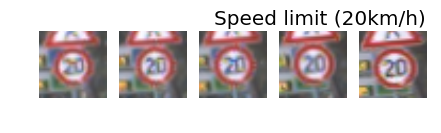

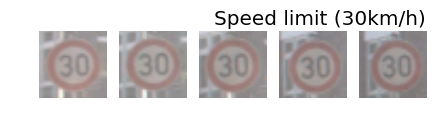

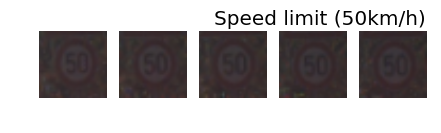

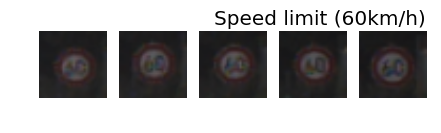

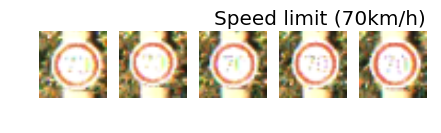

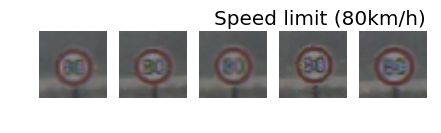

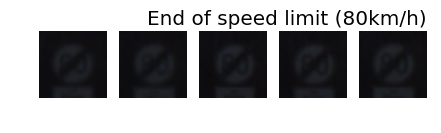

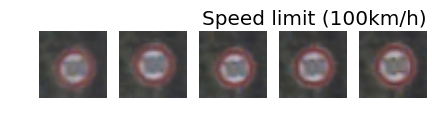

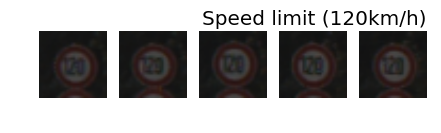

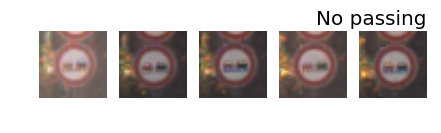

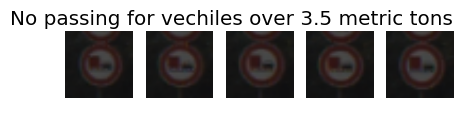

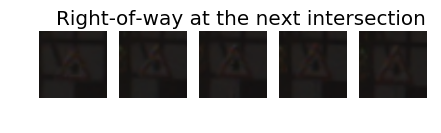

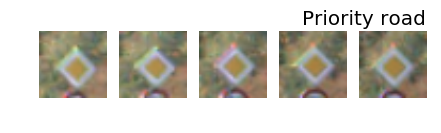

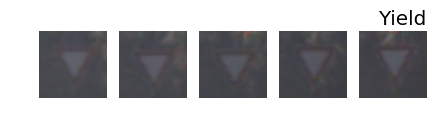

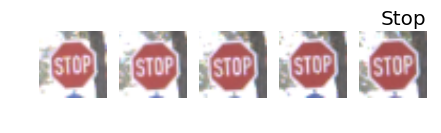

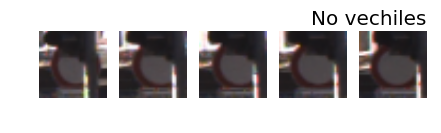

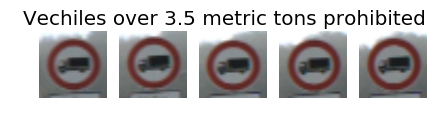

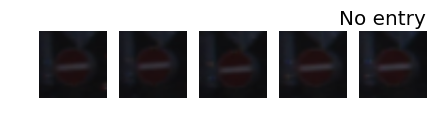

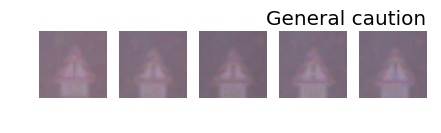

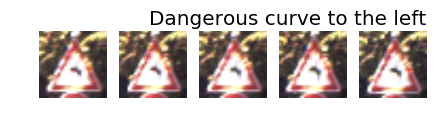

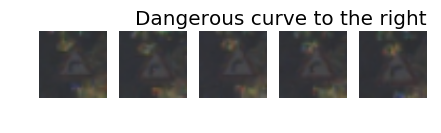

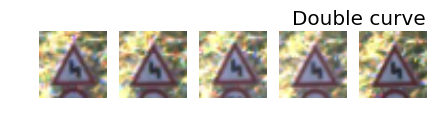

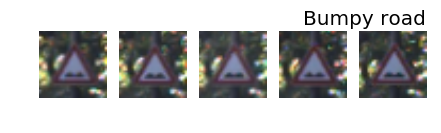

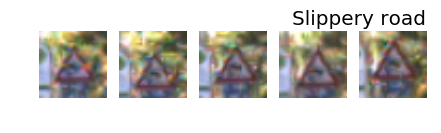

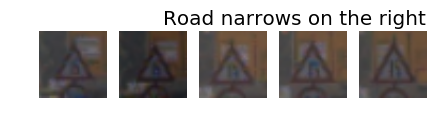

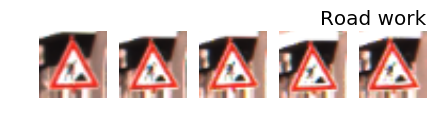

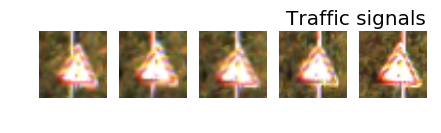

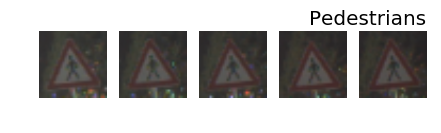

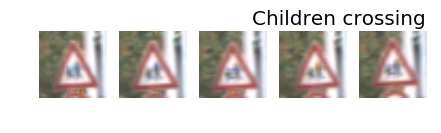

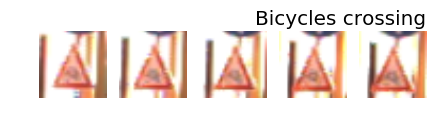

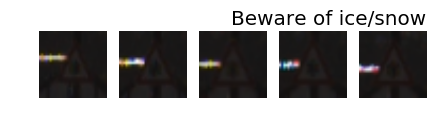

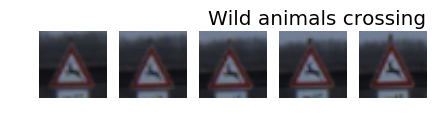

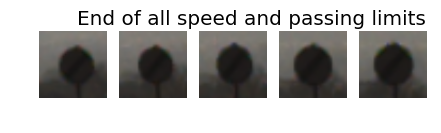

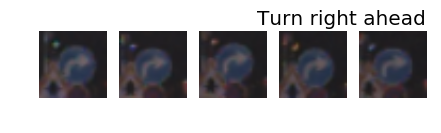

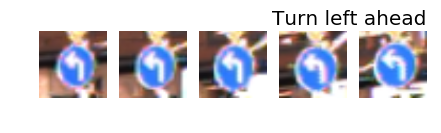

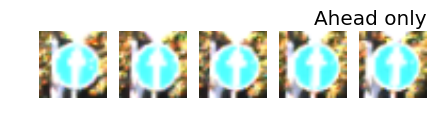

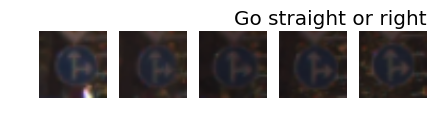

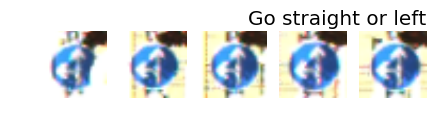

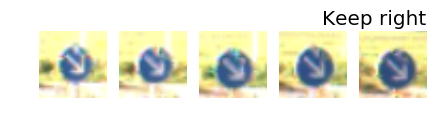

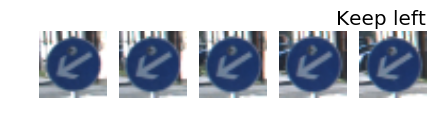

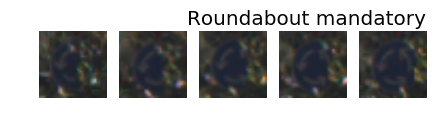

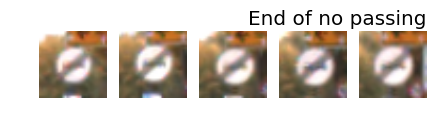

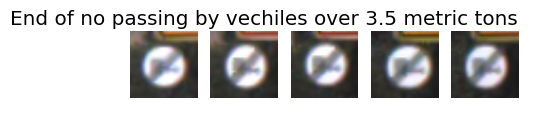

In [7]:
for label in range(n_classes):
    i = 0
    samples = []
    while len(samples) < 5:
        if y_train[i] == label:
            samples.append(X_train[i])
        i += 1
    plot_images_for_label(samples, text_labels[label])    

### Imbalanced Classes

Some of the classes have more samples that others, the maximum number of samples per class in the training dataset is about 2000 and the minimum is about 200.

We also notice that the distribution of samples is about the same between training and testing datasets.

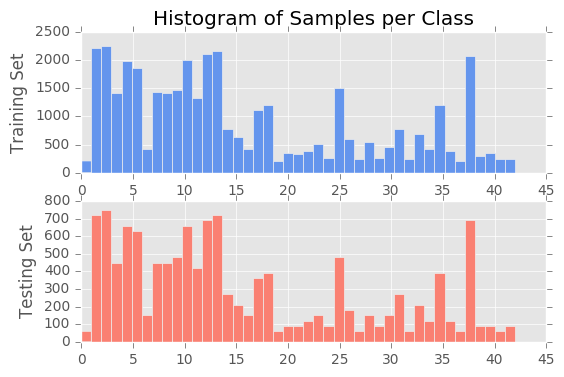

In [8]:
plt.subplot(2, 1, 1)
plt.hist(y_train, bins=n_classes, color='cornflowerblue')
plt.title('Histogram of Samples per Class')
plt.ylabel('Training Set')
plt.subplot(2, 1, 2)
plt.hist(y_test, bins=n_classes, color='salmon')
plt.ylabel('Testing Set')
plt.show()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#### Grayscale and Min-Max Normalization

In [10]:
import cv2
import numpy as np

def grayscale(images):
    n_images = images.shape[0]
    converted = []
    for i in range(0, n_images):
        converted.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
    return np.array(converted)


# Normalize Grayscale Image using Min-Max
def normalize(images):
    x_min = images.min()
    x_max = images.max()
    a = 0.1
    b = 0.9
    return a + (images - x_min)*(b - a)/(x_max - x_min)


def norm(images):
    return normalize(grayscale(images))

X_train_0 = norm(X_train).reshape(X_train.shape[0], 1024)
X_test_0 = norm(X_test).reshape(X_test.shape[0], 1024)

#### One-Hot Label Encoding

In [11]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit(y_train)

y_train_one_hot_0 = encoder.transform(y_train)
y_test_one_hot_0 = encoder.transform(y_test)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

For the preprocessing stage, I decided to convert the images to grayscale and apply min-max normalization.
This was based on the resuls from the suggested paper from Yann LeCun in the introduction. In the summary the authors mention that the best result was achieved with grayscale images.

Also I did reshape the training images and apply one-hot encoding to the labels to prepare them for the training pipeline.

---

In [12]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#### Splitting the data

In [13]:
from sklearn.model_selection import train_test_split

X_train_norm, X_valid_norm, y_train_one_hot, y_valid_one_hot = train_test_split(X_train_0,
                                                                                y_train_one_hot_0,
                                                                                test_size=0.05,
                                                                                random_state=123)
X_test_norm, y_test_one_hot = X_test_0, y_test_one_hot_0

print('Training size is %d' % X_train_norm.shape[0])
print('Validation size is %d' % X_valid_norm.shape[0])
print('Testing size is %d' % X_test_norm.shape[0])


Training size is 37248
Validation size is 1961
Testing size is 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I didn't touch the original testing data. I splitted the original training data into training and validation sets.
For validation I chose 5% of the original training set, since we don't have that many images.

In this initial model I won't generate additional images (data augmentation), but I would need to do this if the performance of the model is not that good. In particular that could be helpful to compensate the classes that don't have many samples (from the previous histogram).

---

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [15]:
import tensorflow as tf

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Final Model
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 32, 32, 1])

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.dropout(fc1, dropout)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.01)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.01)),
    'wd1': tf.Variable(tf.truncated_normal([4096, 128], stddev=0.01)),
    'out': tf.Variable(tf.truncated_normal([128, n_classes], stddev=0.01)),
}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([32], stddev=0.01)),
    'bc2': tf.Variable(tf.truncated_normal([64], stddev=0.01)),
    'bd1': tf.Variable(tf.truncated_normal([128], stddev=0.01)),
    'out': tf.Variable(tf.truncated_normal([n_classes], stddev=0.01)),
}

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I'm using a Convolutional Neural Network with these layers:

- Input
- Convolution / Relu
- Pooling
- Convolution / Relu
- Pooling
- Fully Connected
- Dropout

And a final Softmax layer for the final class prediction. The fully connected layer has 128 units.

---

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [28]:
import time
import math

start_time = time.time()

# Parameters
learning_rate = 0.001
epochs = 20
batch_size = 256
dropout = 0.75

n_inputs = 32 * 32             # 1024
n_classes = len(set(y_train))  # 43

# Input: (k, 32*32)
x = tf.placeholder(tf.float32, [None, n_inputs])

# Output: (k, 43)
y = tf.placeholder(tf.float32, [None, n_classes])

# Dropout keep probability
keep_prob = tf.placeholder(tf.float32)

# Feed dicts for validation and testing
valid_feed_dict = {x: X_valid_norm, y: y_valid_one_hot, keep_prob: 1.0}
test_feed_dict = {x: X_test_norm, y: y_test_one_hot, keep_prob: 1.0}

# Model
logits = conv_net(x, weights, biases, keep_prob)
pred = tf.nn.softmax(logits)

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate Mode
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


# Initialize Variables
init = tf.initialize_all_variables()

# Launch the Graph
sess = tf.Session()

sess.run(init)

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []
test_acc_batch = []

init = tf.initialize_all_variables()

session = tf.Session()
session.run(init)
batch_count = int(math.ceil(len(X_train_norm)/batch_size))

for epoch_i in range(epochs):

    # The training cycle
    for batch_i in range(batch_count):
        # Get a batch of training features and labels
        start = batch_i * batch_size
        batch_x = X_train_norm[start:start+batch_size]
        batch_y = y_train_one_hot[start:start+batch_size]

        # Run optimizer and get loss
        _, l = session.run([optimizer, cost],
                           feed_dict={x: batch_x,
                                      y: batch_y,
                                      keep_prob: dropout})

        # Log every 50 batches
        if not batch_i % log_batch_step:
            # Calculate Training and Validation accuracy
            train_acc = session.run(accuracy, feed_dict={x: batch_x,
                                                         y: batch_y,
                                                         keep_prob: 1.0})
            valid_acc = session.run(accuracy, feed_dict=valid_feed_dict)
            test_acc = session.run(accuracy, feed_dict=test_feed_dict)
            
            # Print every 10000 batches
            if not batch_i % (log_batch_step * 200):
                print('batch: {:.4f}  '.format(train_acc),
                      'validation: {:.4f}  '.format(valid_acc),
                      'testing: {:.4f}  '.format(test_acc),
                      'loss: {:.4f}  '.format(l))

            # Log batches
            previous_batch = batches[-1] if batches else 0
            batches.append(log_batch_step + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(train_acc)
            valid_acc_batch.append(valid_acc)
            test_acc_batch.append(test_acc)
            
test_acc = session.run(accuracy, feed_dict=test_feed_dict)
print('Final testing accuracy {:.4f}'.format(test_acc))

end_time = time.time()
print('Duration: {:.0f}m'.format((end_time - start_time) / 60))

batch: 0.0742   validation: 0.0449   testing: 0.0594   loss: 3.7606  
batch: 0.1289   validation: 0.1101   testing: 0.1047   loss: 3.3477  
batch: 0.5195   validation: 0.5054   testing: 0.4533   loss: 1.7970  
batch: 0.7734   validation: 0.7986   testing: 0.6892   loss: 0.9342  
batch: 0.8750   validation: 0.8858   testing: 0.7913   loss: 0.4993  
batch: 0.9219   validation: 0.9306   testing: 0.8393   loss: 0.3247  
batch: 0.9414   validation: 0.9480   testing: 0.8570   loss: 0.2389  
batch: 0.9609   validation: 0.9556   testing: 0.8747   loss: 0.1850  
batch: 0.9648   validation: 0.9628   testing: 0.8852   loss: 0.1593  
batch: 0.9766   validation: 0.9628   testing: 0.8907   loss: 0.1220  
batch: 0.9805   validation: 0.9714   testing: 0.8918   loss: 0.0930  
batch: 0.9961   validation: 0.9674   testing: 0.8930   loss: 0.0818  
batch: 0.9883   validation: 0.9776   testing: 0.9023   loss: 0.0536  
batch: 1.0000   validation: 0.9801   testing: 0.9012   loss: 0.0283  
batch: 0.9922   vali

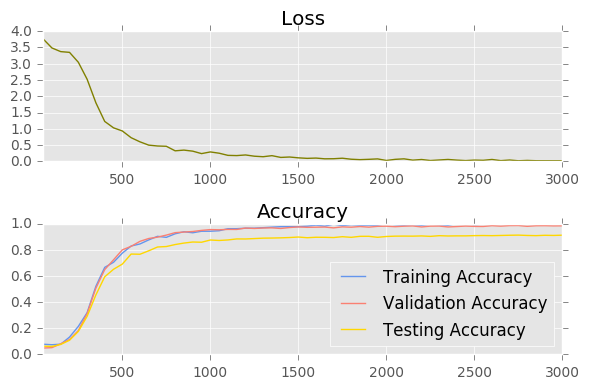

In [29]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'olive')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'cornflowerblue', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'salmon', label='Validation Accuracy')
acc_plot.plot(batches, test_acc_batch, 'gold', label='Testing Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [19]:
# sess.close() # This will terminate the model

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

These are the hyperparameters I used in this CNN model:

- learning_rate = 0.001
- epochs = 50
- batch_size = 256
- dropout = 0.75

I used the `softmax_cross_entropy_with_logits` function from TensorFlow for the `loss` and `AdamOptimizer` as the optimizer.

One interesting observation of this model, is that with that number of epochs, it didn't overfit. If I leave it running longer the accuracy keeps improving.

---

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

First I tried a model similar to the TensorFlow lab example. That was a single layer, but the validation accuracy was low compared to the training batch.

I decided to switch to a more complex CNN model. For the final training I did try several values of the hyperparameters, until I found a set that make the loss decrease and the validation accuracy increase.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [53]:
from skimage import io

new_images = []
new_images.append(io.imread('http://3.bp.blogspot.com/_7PbGEP1owXc/SoTie9DxT8I/AAAAAAAAQ0Y/XLKJzsKP-SQ/s400/street+signs.jpg'))
new_images.append(io.imread('http://www.onlinetraffic.com/images/reading/ch5/no-u-turn.jpg'))
new_images.append(io.imread('http://farm4.staticflickr.com/3119/3196395232_330a23548c_m.jpg'))
new_images.append(io.imread('https://i.kinja-img.com/gawker-media/image/upload/s--sH8fK9aL--/c_fit,fl_progressive,q_80,w_636/18n30k34852wzjpg.jpg'))
new_images.append(io.imread('http://1.bp.blogspot.com/_QGhxX4E-xtk/TIArb5HfxlI/AAAAAAAAA4I/dUlWLAJ-PyQ/s1600/IMG_6754.JPG'))

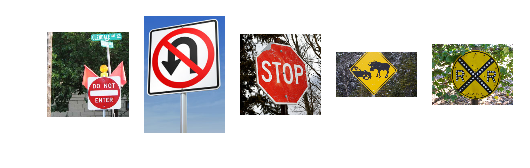

In [54]:
for idx, img in enumerate(new_images):
    plt.subplot(1, 5, idx + 1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

From the images I chose, only the third one looks similar to the ones in the training set.
The other images do not have equivalent. In contrast with the images in the training set these new images are shaper and clearer.

In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#### Resize and Normalize New Test Images

To be able to classify the new images, we need to format them according to the input required by the model.

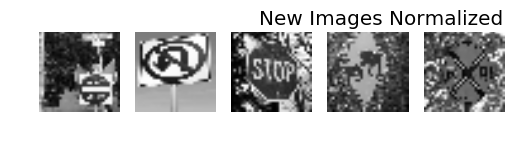

In [57]:
new_images_resize = []
for img in new_images:
    new_images_resize.append(cv2.resize(img, (32, 32)))
    
new_images_norm = norm(np.array(new_images_resize))

for idx, img in enumerate(new_images_norm):
    plt.subplot(1, 5, idx + 1)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.title('New Images Normalized', loc='right')
plt.show()

In [58]:
new_predictions = session.run(pred, feed_dict={x: new_images_norm.reshape(5, 1024), keep_prob: 1.0})

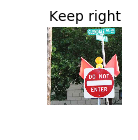

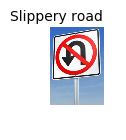

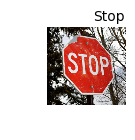

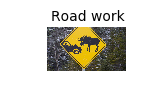

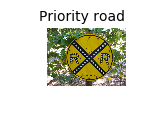

In [59]:
for idx, img in enumerate(new_images):
    predicted_label = text_labels[np.argmax(new_predictions[idx])]
    plt.figure(figsize=(1, 1))
    plt.imshow(img)
    plt.axis('off')
    plt.title(predicted_label, loc='right', fontsize=10)
    plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

It did not perform well on images that don't exist in the dataset. But it was able to identify correctly the stop sign. I think my model will be able to perform equally well on captured pictures or camera streams as long as we have seen similar examples in the training set.

---

In [25]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [63]:
top_five = tf.nn.top_k(pred, k=5, sorted=True, name=None)
result = session.run(top_five, feed_dict={x: new_images_norm.reshape(5, 1024), keep_prob: 1.0})

In [74]:
result.values[0]

array([  8.70388925e-01,   1.29601941e-01,   9.12496762e-06,
         1.82860838e-08,   2.84528379e-09], dtype=float32)

In [75]:
result.indices[0]

array([38, 20, 18, 23, 12], dtype=int32)

38 Keep right
20 Dangerous curve to the right
18 General caution
23 Slippery road
12 Priority road


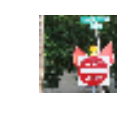


23 Slippery road
17 No entry
20 Dangerous curve to the right
19 Dangerous curve to the left
9 No passing


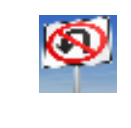


14 Stop
38 Keep right
34 Turn left ahead
17 No entry
33 Turn right ahead


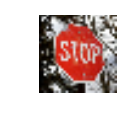


25 Road work
13 Yield
39 Keep left
19 Dangerous curve to the left
10 No passing for vechiles over 3.5 metric tons


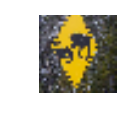


12 Priority road
11 Right-of-way at the next intersection
21 Double curve
40 Roundabout mandatory
25 Road work


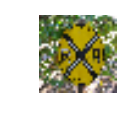

In [81]:
for i in range(len(new_images_norm)):
    for idx in result.indices[i]:
        print(idx, text_labels[idx])
    plt.figure(figsize=(1, 1))
    plt.imshow(new_images_resize[i])
    plt.axis('off')
    plt.show()
    print('')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

From the selected images, only the stop sign was detected correctly and the probability was high for the correct one. The other images contain some patterns that match with the training set images, but they were not really present in the training.

---

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

No additional documentation is required, all the required code was inlined in this notebook.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.